## Notebook description
This notebook is for visulizing mosques in Egypt on a map.
<br>
Mosques in Egypt is a scraped data collected as part of Omdena Giza Local Chapter Project “Creating & Analysing Open Data About Egypt"

In [1]:
!pip install openpyxl

In [2]:
import numpy as np 
import pandas as pd
import re 

In [3]:
df = pd.read_excel('../input/mosquesegypt/mosque-egypt.xlsx', engine='openpyxl')
df.head()

In [4]:
df.shape

In [5]:
df.info()

This feature that we are interested in is the location feature

In [6]:
df['Location']

For visualizing on a map, we are going to use the cartopy library

In [7]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy.io.shapereader as shpreader
import matplotlib.pyplot as plt


To draw Egypt on the map, we used the shapefile of Egypt from here https://gadm.org/download_country.html

In [8]:
fname = '../input/egyshp2/gadm40_EGY_1.shp'

adm1_shapes = list(shpreader.Reader(fname).geometries())

ax = plt.axes(projection=ccrs.PlateCarree())

plt.title('Egypt')
ax.coastlines(resolution='10m')

ax.add_geometries(adm1_shapes, ccrs.PlateCarree(),
                  edgecolor='black', facecolor='gray', alpha=0.5)

ax.set_extent([24, 36, 22, 32], ccrs.PlateCarree())

plt.show()

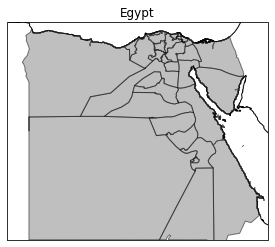

**point Cairo on the map**

In [10]:
cairo_lon, cairo_lat = 31.233334, 30.033333
fig = plt.figure(figsize=(14, 14))
m6 = plt.axes(projection=ccrs.PlateCarree())
m6.set_extent([24, 36, 22, 32], ccrs.PlateCarree())         
m6.add_feature(cfeature.STATES)
m6.coastlines()
m6.scatter(cairo_lon, cairo_lat, color='red', transform=ccrs.PlateCarree())



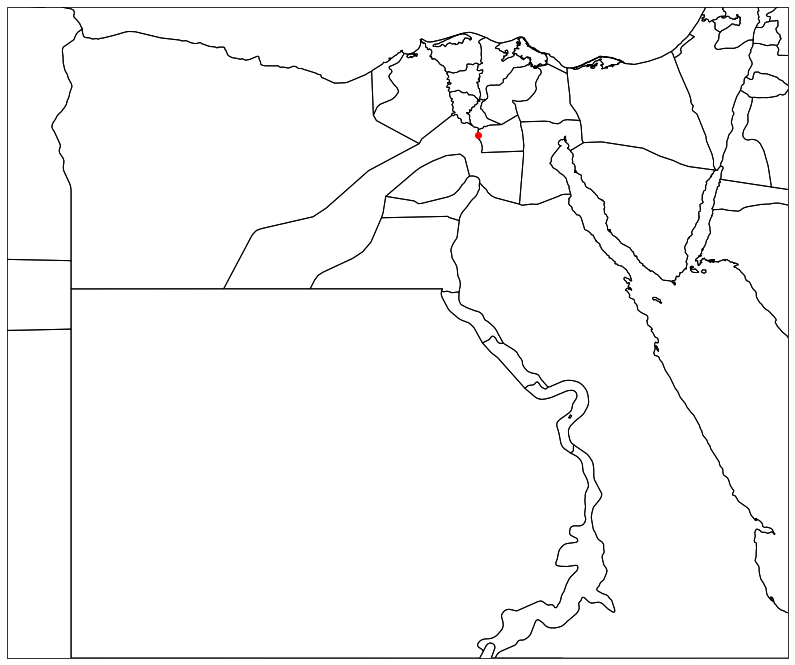

## clean the Location column
As we said, we are intersted in the Location column and it has to be cleaned to have the lat and lon ready for visualization

In [11]:
def clean_location(location):
    
    for punc in '\°':
        location = ' '.join(location.split(punc))
        
        cities = ['New', 'Administrative', 'Capital', 'Cairo', 'Alexandria',
                 'Luxor', 'Aswan', 'Desouk', 'Damietta', 'Tanta',
                 'Sohag']
        words_in_row = location.split()
        for word in words_in_row:
            if word in cities:
                location = location.replace(word," ")
        return location
                

In [12]:
def get_coordinates(location):
    location = re.findall('/.*/(.*)',location)
    location = [item.replace(";", ",") for item in location]
    return location

In [13]:
df['Location'] = df['Location'].apply(clean_location)

In [14]:
df['Location'] = df['Location'].apply(get_coordinates)

In [15]:
#delete rows with empty coordinates
df = df[df['Location'].map(lambda d: len(d)) > 0]
df.shape

In [16]:
df["Location"] = df["Location"].str[0]
df["Location"] = df["Location"].apply(lambda x: x.split(','))

In [17]:
df['latitude'] = df['Location'].str[0]
df['longitude'] = df['Location'].str[1]

In [18]:
df.head()

In [19]:
fig = plt.figure(figsize=(14, 14))
m6 = plt.axes(projection=ccrs.PlateCarree())
m6.set_extent([24, 36, 22, 32], ccrs.PlateCarree())         
m6.add_feature(cfeature.STATES)
m6.coastlines()
for i in df.itertuples():
    m6.scatter(i.longitude, i.latitude, color='blue', transform=ccrs.PlateCarree())
    plt.text(i.longitude, i.latitude, i.Name)

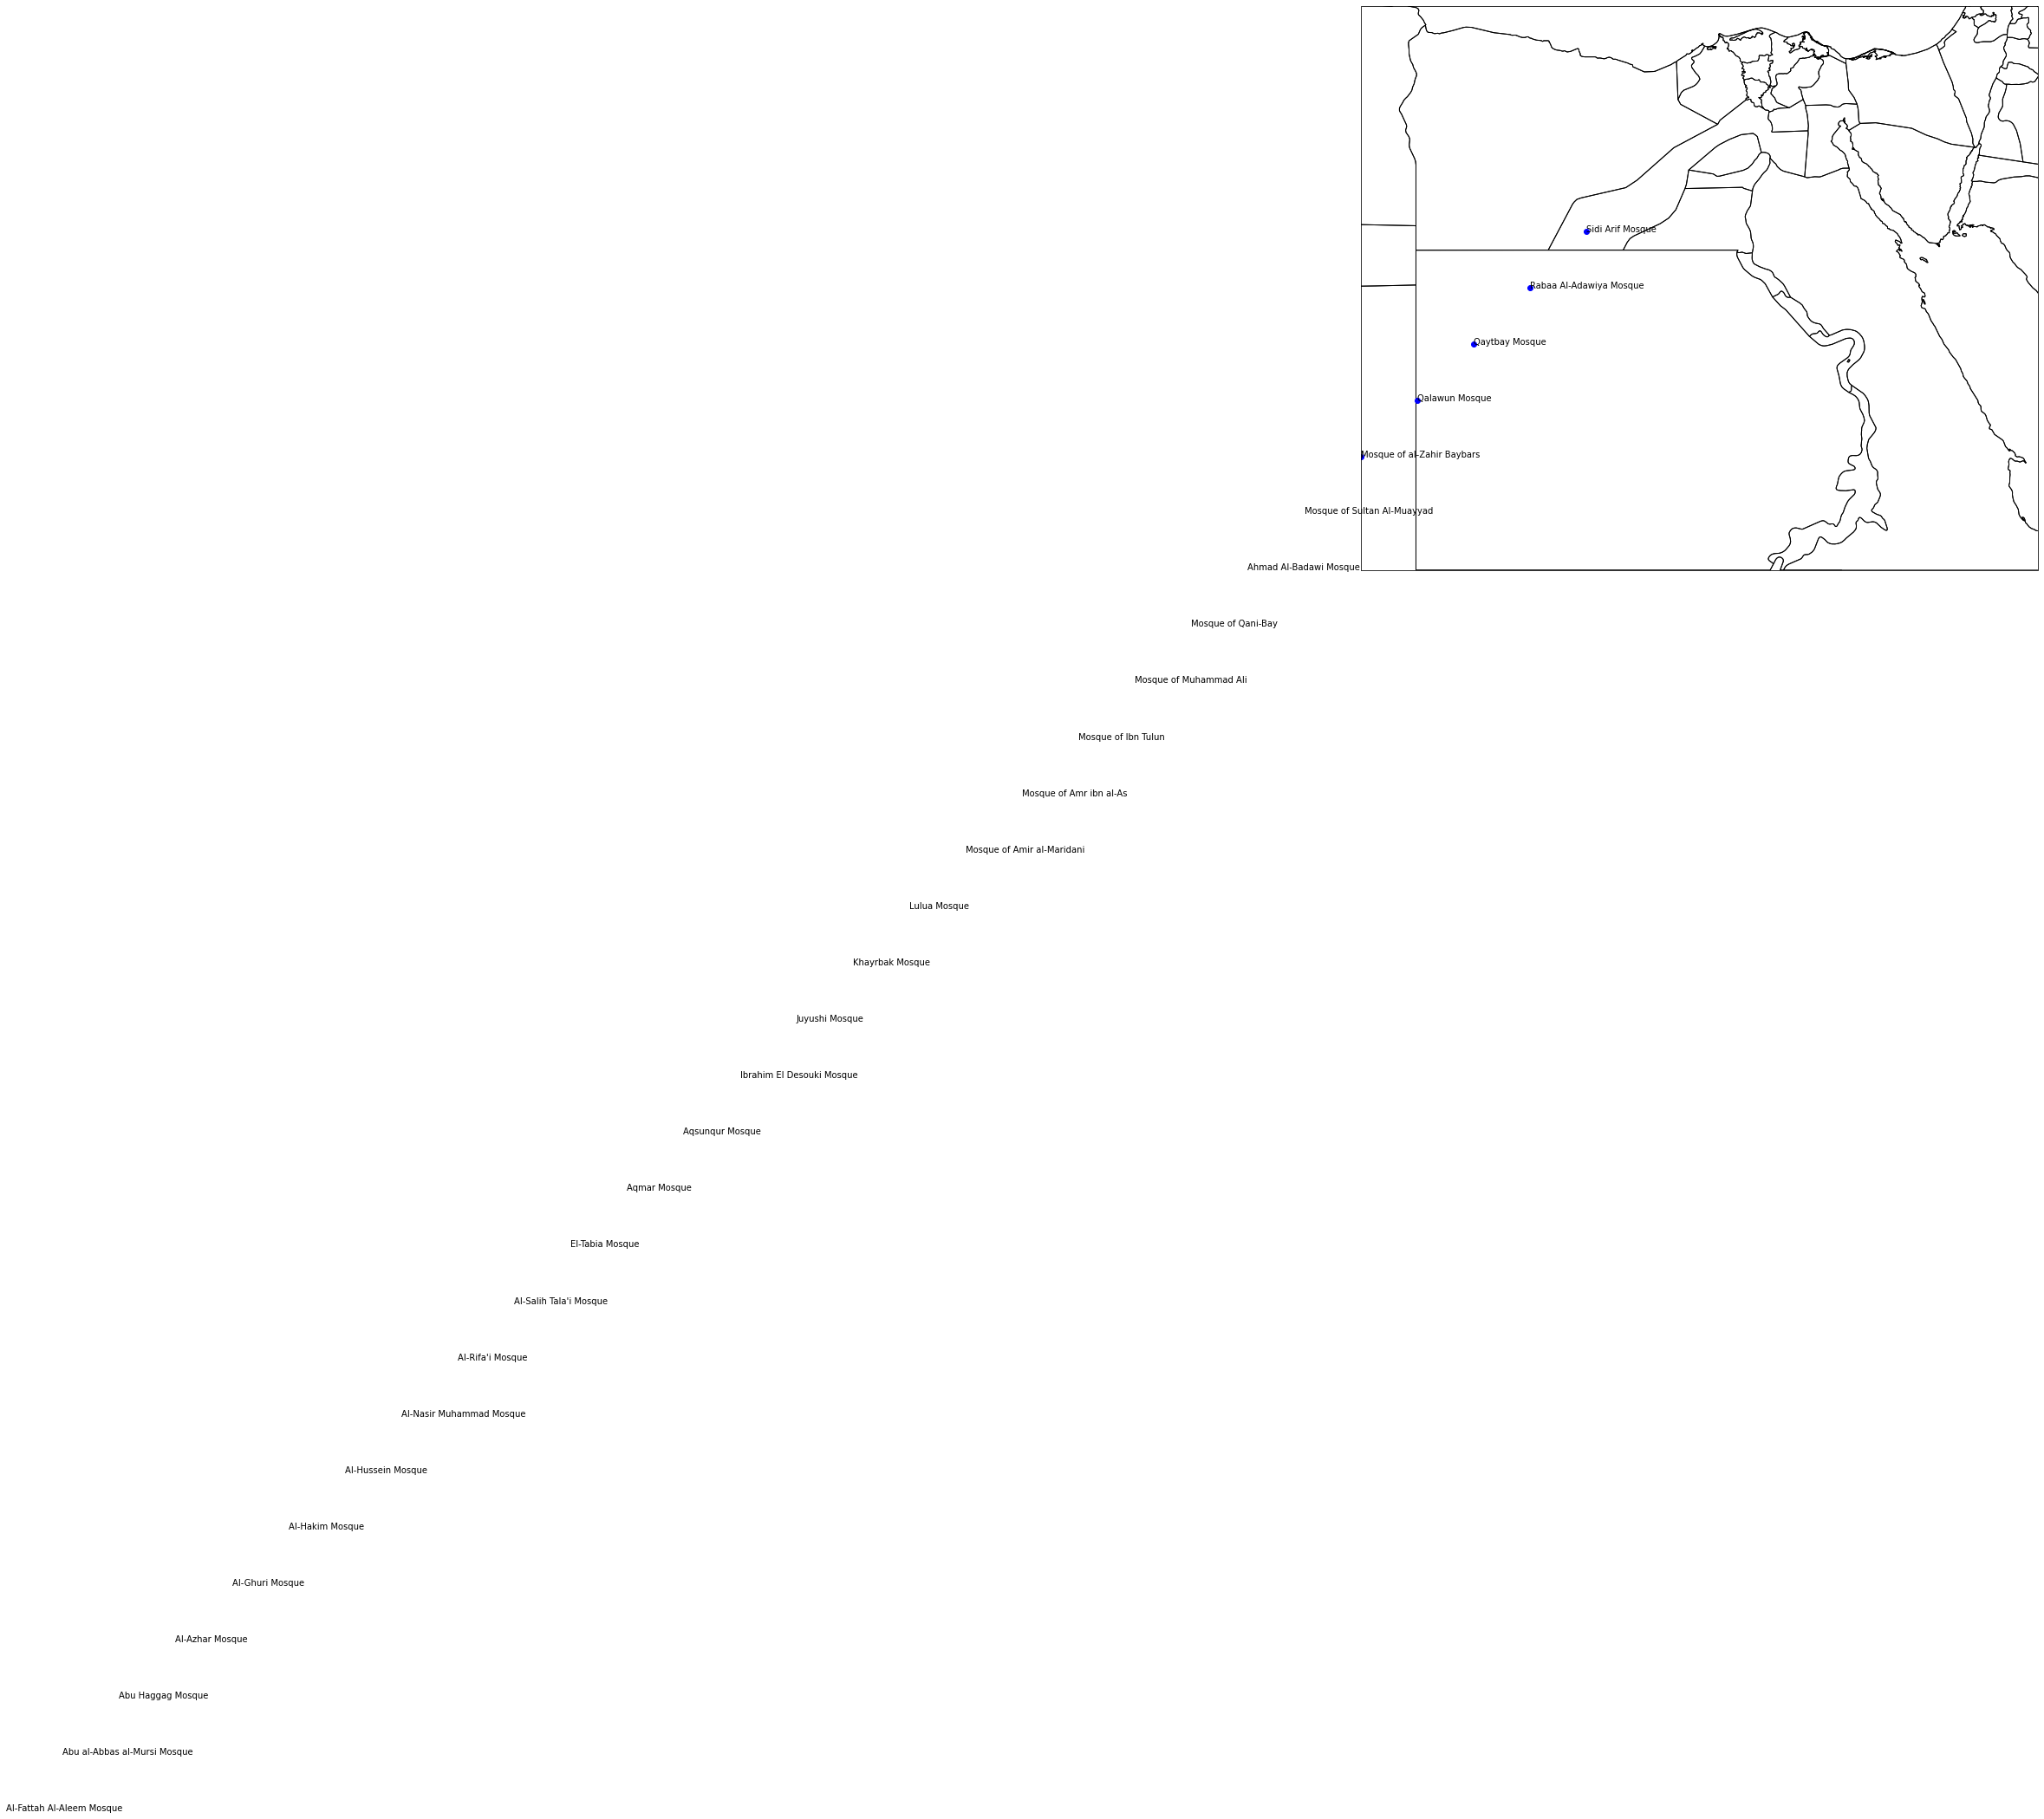